In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import regex as re
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
nltk.download('words')
words = set(nltk.corpus.words.words())
nltk.download('punkt');
# from nltk.sentiment.vader import SentimentIntensityAnalyz
import re
from wordcloud import WordCloud, STOPWORDS 
import requests
from nltk.stem import WordNetLemmatizer
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alison\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Alison\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alison\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [171]:
df = pd.read_csv('chs.csv')

In [172]:
df.head(100)

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2
5,5,1.624520e+18,2023-02-11 21:38:55+00:00,JayneKimlee,"@my2_cents @FulfillHeaven Not sure what this has to do with JMac, but I’m Canadian and our healthcare system is far from fair or perfect- people have to wait for months for treatment they need,like MRI’s,and yet the system is always overloaded and needs more money, even though we pay ridiculous taxes here",1,en,NaN,"@my2_cents @FulfillHeaven Not sure what this has to do with JMac, but I’m Canadian and our healthcare system is far from fair or perfect- people have to wait for months for treatment they need,like MRI’s,and yet the system is always overloaded and needs more money, even though we pay ridiculous taxes here",0
6,6,1.624520e+18,2023-02-11 21:19:58+00:00,Nikon_Don,@michaeljburry On our way to a Canadian healthcare system....,2,en,NaN,@michaeljburry On our way to a Canadian healthcare system....,0
7,7,1.624520e+18,2023-02-11 21:15:30+00:00,vaestervik,"@sj

<AxesSubplot:>

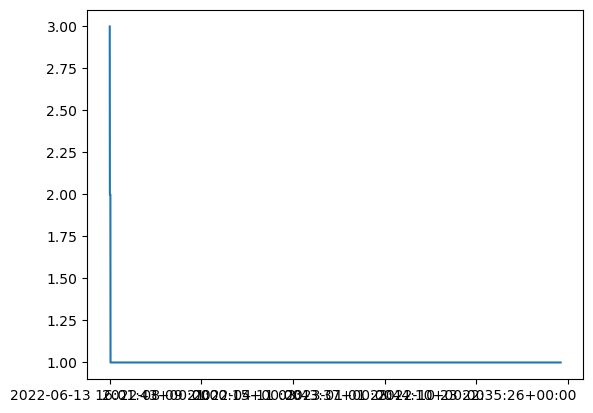

In [173]:
df['Date'].value_counts().plot()

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9859 non-null   int64  
 1   ID              9859 non-null   float64
 2   Date            9859 non-null   object 
 3   User            9859 non-null   object 
 4   Tweet           9859 non-null   object 
 5   replyCount      9859 non-null   int64  
 6   lang            9859 non-null   object 
 7   Place           126 non-null    object 
 8   rendercontents  9859 non-null   object 
 9   Like_Count      9859 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 770.4+ KB


In [175]:
df['Date'] =  pd.to_datetime(df['Date'])

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      9859 non-null   int64              
 1   ID              9859 non-null   float64            
 2   Date            9859 non-null   datetime64[ns, UTC]
 3   User            9859 non-null   object             
 4   Tweet           9859 non-null   object             
 5   replyCount      9859 non-null   int64              
 6   lang            9859 non-null   object             
 7   Place           126 non-null    object             
 8   rendercontents  9859 non-null   object             
 9   Like_Count      9859 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 770.4+ KB


In [177]:
df.head()

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2


In [178]:
df['Date'].value_counts()

2022-06-13 16:01:43+00:00    3
2022-12-27 16:39:58+00:00    2
2023-01-13 10:54:43+00:00    2
2022-12-10 04:39:44+00:00    2
2023-02-01 18:11:40+00:00    2
2022-10-13 13:36:54+00:00    2
2022-02-19 17:10:21+00:00    2
2023-02-08 18:40:32+00:00    2
2022-12-30 17:27:36+00:00    2
2023-02-11 14:01:42+00:00    2
2022-09-08 02:46:25+00:00    2
2022-07-12 11:41:35+00:00    2
2023-01-26 23:24:54+00:00    2
2023-02-01 04:03:57+00:00    2
2022-07-22 03:19:10+00:00    2
2022-07-11 22:48:51+00:00    1
2022-07-11 23:13:10+00:00    1
2022-07-11 23:26:46+00:00    1
2022-07-11 23:58:26+00:00    1
2022-07-12 01:38:52+00:00    1
2022-07-12 06:02:46+00:00    1
2022-07-12 01:43:38+00:00    1
2022-07-12 02:20:45+00:00    1
2022-07-12 03:49:25+00:00    1
2022-07-11 20:53:10+00:00    1
2022-07-12 04:14:29+00:00    1
2022-07-12 21:48:22+00:00    1
2022-07-12 21:31:50+00:00    1
2022-07-12 05:57:35+00:00    1
2022-07-12 14:54:48+00:00    1
2022-07-12 14:43:49+00:00    1
2022-07-12 10:31:47+00:00    1
2022-07-

In [179]:
df['Dates'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Date']).dt.time

In [180]:
df.head()

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2,2023-02-11,22:01:30


In [181]:
df['Dates'].value_counts()/len(df.Dates)*100

2023-02-08    1.115732
2023-01-17    1.014302
2022-12-13    0.923015
2023-02-07    0.892585
2023-01-18    0.862156
2022-11-14    0.841870
2022-12-12    0.831727
2023-01-25    0.801298
2022-11-15    0.791155
2023-01-16    0.740440
2022-12-14    0.720154
2023-01-13    0.649153
2023-01-11    0.639010
2023-02-06    0.628867
2022-08-13    0.608581
2022-09-07    0.598438
2023-02-01    0.598438
2022-01-11    0.588295
2022-08-12    0.588295
2023-01-19    0.578152
2023-01-23    0.557866
2022-12-15    0.547723
2023-01-12    0.547723
2023-01-26    0.537580
2022-12-06    0.527437
2022-12-17    0.527437
2022-11-18    0.527437
2022-01-12    0.527437
2023-01-31    0.527437
2022-11-16    0.517294
2023-01-10    0.517294
2022-12-07    0.507151
2023-01-21    0.507151
2022-08-11    0.507151
2022-12-16    0.507151
2023-01-15    0.497008
2022-11-13    0.486865
2023-02-09    0.486865
2022-12-11    0.476722
2023-01-30    0.476722
2022-11-27    0.476722
2022-08-25    0.476722
2022-11-20    0.466579
2022-11-29 

In [182]:
# Create new columns
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      9859 non-null   int64              
 1   ID              9859 non-null   float64            
 2   Date            9859 non-null   datetime64[ns, UTC]
 3   User            9859 non-null   object             
 4   Tweet           9859 non-null   object             
 5   replyCount      9859 non-null   int64              
 6   lang            9859 non-null   object             
 7   Place           126 non-null    object             
 8   rendercontents  9859 non-null   object             
 9   Like_Count      9859 non-null   int64              
 10  Dates           9859 non-null   object             
 11  Time            9859 non-null   object             
 12  day             9859 non-null   int64              
 13  month           9859 non-null   i

In [184]:
df['year'].value_counts()/len(df.Dates)*100

2022    80.403692
2023    19.596308
Name: year, dtype: float64

<AxesSubplot:>

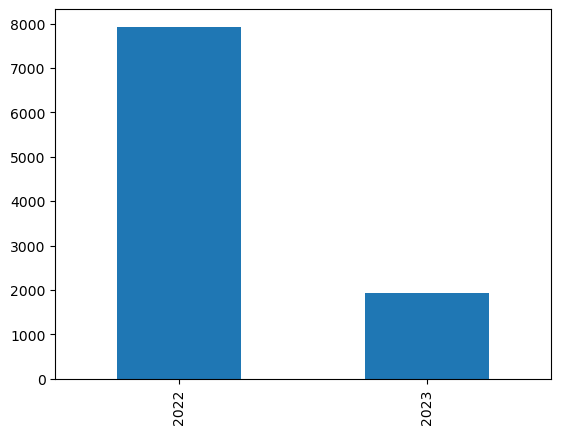

In [185]:
df['year'].value_counts().plot.bar()

In [186]:
df.head()

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2,2023-02-11,22:01:30,11,2,2023


In [187]:
df['Hashtags'] = df['Tweet'].str.findall(r'#.*?(?=\s|$)')

In [188]:
df.head()

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[]
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[]
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[]
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023,[]
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2,2023-02-11,22:01:30,11,2,2023,[]


In [189]:
df['mentions'] = df['Tweet'].str.findall(r'[＠@]([^][\s#<>|{}]+)')

In [190]:
df.head(20)

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]"
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[],"[tomcollins80, EdtheSock, babsy1234]"
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[],"[KristyAmbrose1, EdtheSock, babsy1234]"
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023,[],[]
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2,2023-02-11,22:01:30,11,2,2023,[],[globalnews]
5,5,1.624520e+18,2023-02-11 21:38:55+00:00,JayneKimlee,"@my2_cents @FulfillHeaven Not sure what this has to do with JMac, but I’m Canadian and our healthcare system is far from fair or perfect- people have to wait for months for treatment they need,like MRI’s,and yet the system is always overloaded and needs more money, even though we pay ridiculous taxes here",1,en,NaN,"@my2_cents @FulfillHeaven Not sure what this has to do with JMac, but I’m Canadian and our healthcare system is far from fair or perfect- people have to wait for months for treatm

In [191]:
def remove_hashtags_usernames(tweet):
    # Use regex to match hashtags (starting with #) and usernames (starting with @)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    return tweet

cleaned_tweets = []
for tweet in df['Tweet']:
    cleaned_tweet = remove_hashtags_usernames(tweet)
    cleaned_tweet = re.sub('\W+',' ', cleaned_tweet )
    cleaned_tweets.append(cleaned_tweet)
    


In [192]:
df['cleaned_tweets'] = cleaned_tweets

In [193]:
df.head()

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",Bullshit I ve never met a Canadian or Brit who would willingly trade their healthcare system for ours Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn t come with a side of bankruptcy I have health insurance and med bills
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[],"[tomcollins80, EdtheSock, babsy1234]",Great story brah Allow me to file it under shit that never happened third world healthcare system And how much is YOUR medical debt No way a Canadian said this to you I REPEAT do you even GET the CBC
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[],"[KristyAmbrose1, EdtheSock, babsy1234]",No I said I was trying to get some Canadian culture my partner is a Canadian he is here escaping taxes and your third world healthcare system CBC is an obvious hit piece on anything not Liberal Green or NDP They are afraid of the obscure Quebec parties
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023,[],[],Wake up people Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world But hey lets keep voting a narcissistic dictator nutjob back in Is every one bra

In [194]:
comment_words = '' 
add_stop = ['https', 'rt', 'healthcare', 'system', 'canadian','canada','canadians','the','in','is','it','on','amp','us','a','i','u','s','dont','t','re','don','m','ve']
stopwords = set(list(STOPWORDS)+add_stop)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'canada',
 'canadian',
 'canadians',
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 'don',
 "don't",
 'dont',
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'healthcare',
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'https',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'm',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'no

In [195]:
for val in df['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [196]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

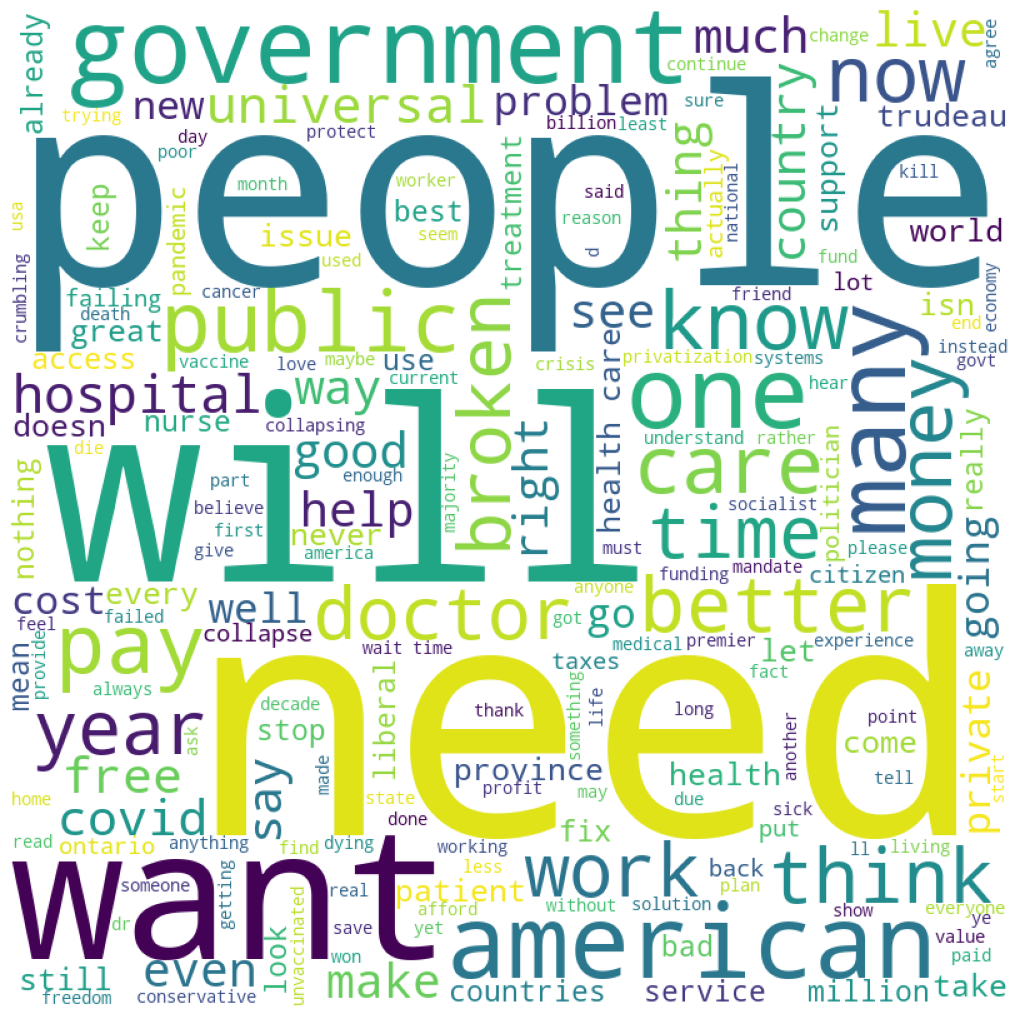

In [197]:
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [198]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in df['cleaned_tweets']]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.125,
 TextBlob(" Bullshit I ve never met a Canadian or Brit who would willingly trade their healthcare system for ours Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn t come with a side of bankruptcy I have health insurance and med bills "))

In [199]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:99]


[[0.125,
  ' Bullshit I ve never met a Canadian or Brit who would willingly trade their healthcare system for ours Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn t come with a side of bankruptcy I have health insurance and med bills '],
 [0.16,
  ' Great story brah Allow me to file it under shit that never happened third world healthcare system And how much is YOUR medical debt No way a Canadian said this to you I REPEAT do you even GET the CBC '],
 [-0.2,
  ' No I said I was trying to get some Canadian culture my partner is a Canadian he is here escaping taxes and your third world healthcare system CBC is an obvious hit piece on anything not Liberal Green or NDP They are afraid of the obscure Quebec parties '],
 [0.25,
  ' Wake up people Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world But hey lets keep voting a narcissistic dictator nutjob back in Is ever

In [200]:
# Create a dataframe of each tweet against its polarity


sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df
df['polarity'] = sentiment_df['polarity']

In [201]:
df.head()

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",Bullshit I ve never met a Canadian or Brit who would willingly trade their healthcare system for ours Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn t come with a side of bankruptcy I have health insurance and med bills,0.125
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[],"[tomcollins80, EdtheSock, babsy1234]",Great story brah Allow me to file it under shit that never happened third world healthcare system And how much is YOUR medical debt No way a Canadian said this to you I REPEAT do you even GET the CBC,0.160
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[],"[KristyAmbrose1, EdtheSock, babsy1234]",No I said I was trying to get some Canadian culture my partner is a Canadian he is here escaping taxes and your third world healthcare system CBC is an obvious hit piece on anything not Liberal Green or NDP They are afraid of the obscure Quebec parties,-0.200
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023,[],[],Wake up people Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world But hey lets keep voting a narcissistic dictator nut

In [202]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0       1.250000e-01
1       1.600000e-01
2      -2.000000e-01
3       2.500000e-01
4       0.000000e+00
5       2.861111e-01
6       0.000000e+00
7      -6.397306e-03
8       1.666667e-01
9      -1.666667e-01
10      2.872024e-01
11     -7.142857e-02
12      2.314815e-01
13      3.050000e-01
14     -1.187500e-01
15      4.333333e-01
16      0.000000e+00
17      2.142857e-01
18      2.000000e-01
19     -1.875000e-01
20      3.703704e-02
21     -5.000000e-02
22     -5.000000e-02
23      0.000000e+00
24      0.000000e+00
25     -3.450000e-01
26      0.000000e+00
27      5.000000e-01
28      1.111111e-01
29      1.000000e-01
30     -3.000000e-01
31      5.000000e-01
32      2.083333e-01
33      3.000000e-01
34      0.000000e+00
35      0.000000e+00
36      0.000000e+00
37      1.787879e-01
38      1.233333e-01
39     -1.178571e-01
40      4.166667e-01
41      3.000000e-01
42      7.142857e-03
43      0.000000e+00
44      1.000000e-01
45      0.000000e+00
46      1.821429e-01
47     -3.000

In [203]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

sentiment = []
# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        sentiment.append("Positive")
        pos=pos+1
    elif items<0:
        sentiment.append("Negative")
        neg=neg+1
    else:
        sentiment.append("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

5261 2824 1774


In [204]:
df['Sentiment'] = sentiment

In [205]:
df.head()

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity,Sentiment
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",Bullshit I ve never met a Canadian or Brit who would willingly trade their healthcare system for ours Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn t come with a side of bankruptcy I have health insurance and med bills,0.125,Positive
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[],"[tomcollins80, EdtheSock, babsy1234]",Great story brah Allow me to file it under shit that never happened third world healthcare system And how much is YOUR medical debt No way a Canadian said this to you I REPEAT do you even GET the CBC,0.160,Positive
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[],"[KristyAmbrose1, EdtheSock, babsy1234]",No I said I was trying to get some Canadian culture my partner is a Canadian he is here escaping taxes and your third world healthcare system CBC is an obvious hit piece on anything not Liberal Green or NDP They are afraid of the obscure Quebec parties,-0.200,Negative
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023,[],[],Wake up people Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world But hey lets ke

In [206]:
# df.to_csv('tweet_analysis_guitar.csv')

In [211]:
from nltk.stem import SnowballStemmer
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

e_words= [i.strip().lower().split(' ') for i in df['cleaned_tweets']]
# e_words[:2]



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alison\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [212]:
e_words[:2]

[['bullshit',
  'i',
  've',
  'never',
  'met',
  'a',
  'canadian',
  'or',
  'brit',
  'who',
  'would',
  'willingly',
  'trade',
  'their',
  'healthcare',
  'system',
  'for',
  'ours',
  'private',
  'insurance',
  'in',
  'the',
  'us',
  'also',
  'has',
  'waits',
  'to',
  'see',
  'doctors',
  'but',
  'in',
  'canada',
  'that',
  'healthcare',
  'doesn',
  't',
  'come',
  'with',
  'a',
  'side',
  'of',
  'bankruptcy',
  'i',
  'have',
  'health',
  'insurance',
  'and',
  'med',
  'bills'],
 ['great',
  'story',
  'brah',
  'allow',
  'me',
  'to',
  'file',
  'it',
  'under',
  'shit',
  'that',
  'never',
  'happened',
  'third',
  'world',
  'healthcare',
  'system',
  'and',
  'how',
  'much',
  'is',
  'your',
  'medical',
  'debt',
  'no',
  'way',
  'a',
  'canadian',
  'said',
  'this',
  'to',
  'you',
  'i',
  'repeat',
  'do',
  'you',
  'even',
  'get',
  'the',
  'cbc']]

In [213]:
list_words = []
# stemmer = SnowballStemmer("english")

for s in e_words:
    word = []
    for w in s:
        rootWord=lemmatizer.lemmatize(w)
        word.append(rootWord)
    list_words.append(word)

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\Alison/nltk_data'
    - 'C:\\Users\\Alison\\anaconda3\\nltk_data'
    - 'C:\\Users\\Alison\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Alison\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Alison\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [214]:
list_words[2]

IndexError: list index out of range

In [215]:
df['words'] = list_words

ValueError: Length of values (0) does not match length of index (9859)

In [167]:
df.head()

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity,Sentiment,words
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",Bullshit I ve never met a Canadian or Brit who would willingly trade their healthcare system for ours Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn t come with a side of bankruptcy I have health insurance and med bills,0.125,Positive,"[bullshit, i, ve, never, met, a, canadian, or, brit, who, would, will, trade, their, healthcar, system, for, our, privat, insur, in, the, us, also, has, wait, to, see, doctor, but, in, canada, that, healthcar, doesn, t, come, with, a, side, of, bankruptci, i, have, health, insur, and, med, bill]"
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[],"[tomcollins80, EdtheSock, babsy1234]",Great story brah Allow me to file it under shit that never happened third world healthcare system And how much is YOUR medical debt No way a Canadian said this to you I REPEAT do you even GET the CBC,0.160,Positive,"[great, stori, brah, allow, me, to, file, it, under, shit, that, never, happen, third, world, healthcar, system, and, how, much, is, your, medic, debt, no, way, a, canadian, said, this, to, you, i, repeat, do, you, even, get, the, cbc]"
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[],"[KristyAmbrose1, EdtheSock, babsy1234]",No I said I was trying to get some Canadian culture my partner is a Canadian he is here escaping taxes and your third world healthcare system CBC is an obvious hit piece on anything not Liberal Green or NDP They are afraid of the obscure Quebec parties,-0.200,Negative,"[no, i, said, i, was, tri, to, get, some, canadian, cultur, my, partner, is, a, canadian, he, is, here, escap, tax, and, your, third, world, healthcar, system, cbc, is, an, obvious, hit, piec, on, anyth, not, liber, green, or, ndp, they, are, afraid, of, the, obscur

In [168]:
df.to_csv('chs_half.csv')

In [158]:
df_1 = df.explode('words')

In [159]:
df_1.head()

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity,Sentiment,words
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",Bullshit I ve never met a Canadian or Brit who would willingly trade their healthcare system for ours Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn t come with a side of bankruptcy I have health insurance and med bills,0.125,Positive,bullshit
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",Bullshit I ve never met a Canadian or Brit who would willingly trade their healthcare system for ours Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn t come with a side of bankruptcy I have health insurance and med bills,0.125,Positive,i
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",Bullshit I ve never met a Canadian or Brit who would willingly trade their healthcare system for ours Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn t come with a side of bankruptcy I have health insurance and med bills,0.125,Positive,ve
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,

In [161]:
df_1.to_csv('chs_clean.csv')

In [162]:
# df_pos = df['Sentiment'].filter(like='Positive', axis=0)
df_pos = df.where(df["Sentiment"] == 'Positive')
df_pos.dropna(inplace = True)

In [163]:
df_pos.head()

,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity,Sentiment,words
84,84.0,1.623760e+18,2023-02-09 19:13:58+00:00,jdouglaslittle,"Yes it's not enough but BOTH the provinces and feds have to put more on the table. Canadians dont want ""a healthcare system"" they want the worlds best system.\n\nTrudeau's health care offer not enough to address urgent issues in Alberta: critics\n\nhttps://t.co/8yFaOFEJdW",0.0,en,"Place(id='1e5cb4d0509db554', fullName='Vancouver, British Columbia', name='Vancouver', type='city', country='Canada', countryCode='CA')","Yes it's not enough but BOTH the provinces and feds have to put more on the table. Canadians dont want ""a healthcare system"" they want the worlds best system.\n\nTrudeau's health care offer not enough to address urgent issues in Alberta: critics\n\nflip.it/wsl1lY",0.0,2023-02-09,19:13:58,9.0,2.0,2023.0,[],[],Yes it s not enough but BOTH the provinces and feds have to put more on the table Canadians dont want a healthcare system they want the worlds best system Trudeau s health care offer not enough to address urgent issues in Alberta critics,0.375,Positive,"[yes, it, s, not, enough, but, both, the, provinc, and, fed, have, to, put, more, on, the, tabl, canadian, dont, want, a, healthcar, system, they, want, the, world, best, system, trudeau, s, health, care, offer, not, enough, to, address, urgent, issu, in, alberta, critic]"
748,748.0,1.618710e+18,2023-01-26 20:35:49+00:00,1NOnlyJGood,@sylvanlaketrev @RachelNotley everyone is. what really annoys me is when foreigners trash our Healthcare system in the states. yes Canadian Healthcare does have +'s. but the U.S. Healthcare system has its own equally great parts. Just mind your business and fix your own issue ms.,0.0,en,"Place(id='db6cee8d55fe4a29', fullName='Nashua, NH', name='Nashua', type='city', country='United States', countryCode='US')",@sylvanlaketrev @RachelNotley everyone is. what really annoys me is when foreigners trash our Healthcare system in the states. yes Canadian Healthcare does have +'s. but the U.S. Healthcare system has its own equally great parts. Just mind your business and fix your own issue ms.,0.0,2023-01-26,20:35:49,26.0,1.0,2023.0,[],"[sylvanlaketrev, RachelNotley]",everyone is what really annoys me is when foreigners trash our Healthcare system in the states yes Canadian Healthcare does have s but the U S Healthcare system has its own equally great parts Just mind your business and fix your own issue ms,0.550,Positive,"[everyon, is, what, realli, annoy, me, is, when, foreign, trash, our, healthcar, system, in, the, state, yes, canadian, healthcar, doe, have, s, but, the, u, s, healthcar, system, has, it, own, equal, great, part, just, mind, your, busi, and, fix, your, own, issu, ms]"
789,789.0,1.618430e+18,2023-01-26 01:53:39+00:00,mwickens,"Every Canadian leftist, centrist, and most rightists: governments have been underfunding and mismanaging our cherished universal healthcare system for decades. Also, we can allow no alternatives to this system. #onpoli #CDNhealth",0.0,en,"Place(id='3797791ff9c0e4c6', fullName='Toronto, Ontario', name='Toronto', type='city', country='Canada', countryCode='CA')","Every Canadian leftist, centrist, and most rightists: governments have been underfunding and mismanaging our cherished universal healthcare system for decades. Also, we can allow no alternatives to this system. #onpoli #CDNhealth",6.0,2023-01-26,01:53:39,26.0,1.0,2023.0,"[#onpoli, #CDNhealth]",[],Every Canadian leftist centrist and most rightists governments have been underfunding and mismanaging our cherished universal healthcare system for decades Also we can allow no alternatives to this system,0.150,Positive,"[everi, canadian, leftist, centrist, and, most, rightist, govern, have, been, underfund, and, mismanag, our, cherish, univers, healthcar, system, for, decad, also, we, can, allow, no, altern, to, this, system]"

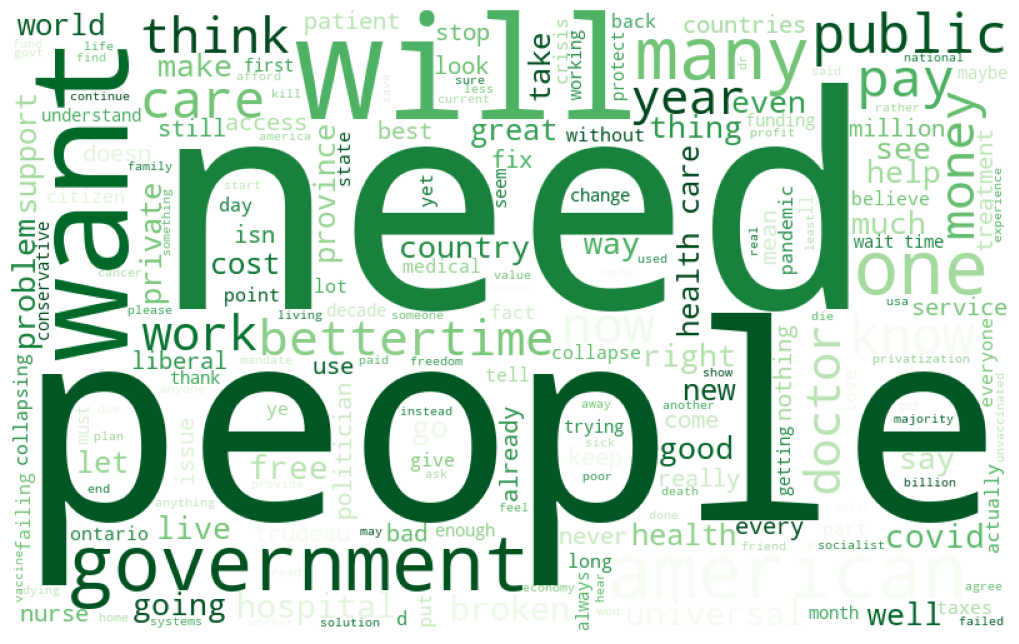

In [164]:
for val in df_pos['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = stopwords,
                      colormap = 'Greens',
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

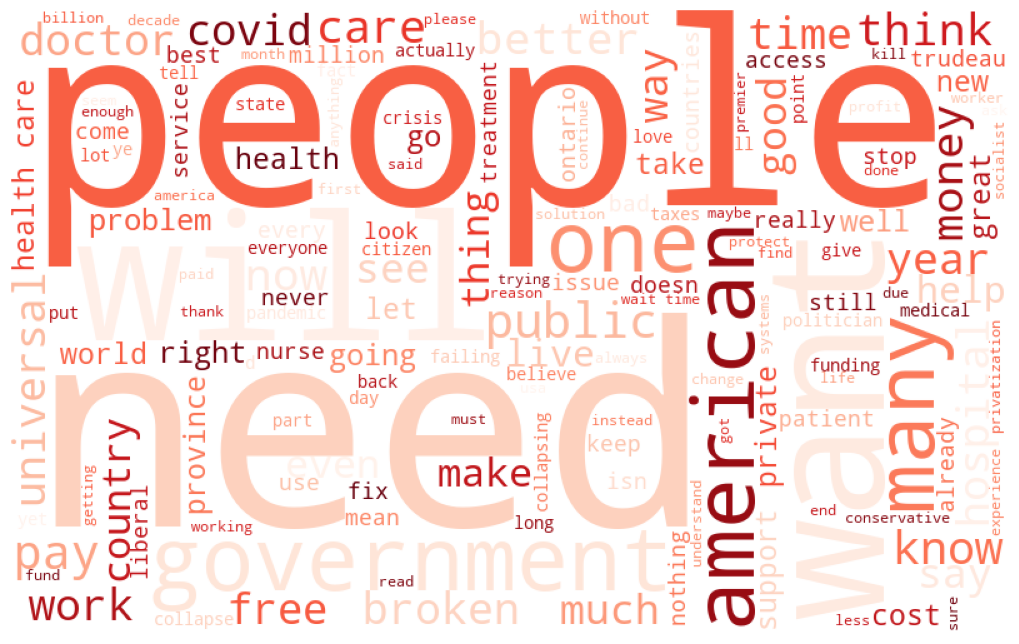

In [165]:
# df_pos = df['Sentiment'].filter(like='Positive', axis=0)
df_neg = df.where(df["Sentiment"] == 'Negative')
df_neg.dropna(inplace = True)

for val in df_neg['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = stopwords,
                      colormap = 'Reds',
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()